PYTORCH -- NEURAL NETWORK CLASSIFICATION

Classification is a problem of predicting whether someting is one thing or another.

1. Make classication data and get it ready

In [1]:
import sklearn

from sklearn.datasets import make_circles

#Make 1000 samples

n_samples=1000

#Create circles

X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

len(X),len(y)

(1000, 1000)

In [2]:
print(f"First 5 samples of X : {X[:5]}")
print(f"First 5 samples of y : {y[:5]}")

First 5 samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y : [1 1 1 1 0]


In [3]:
# Make DataFrame of circle data
import pandas as pd

circles= pd.DataFrame({"X1": X[:,0] ,
                       "X2": X[:,1],
                       "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


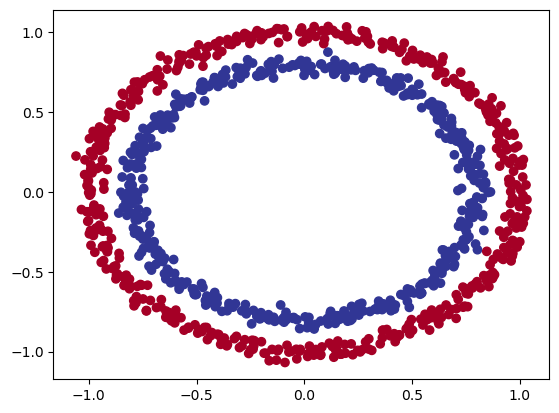

In [4]:
# Visualize it bra

import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [5]:
#Check input and output shapes

X.shape,y.shape

((1000, 2), (1000,))

In [6]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:{y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:1
Shape for one sample of X: (2,) and the same for y:()


In [8]:
#Turn data into tensors and test splits
import torch
torch.__version__

'2.0.0'

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2 #%20 of data is test
                                                    ,
                                                    random_state=42)


In [11]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [12]:
#Build a model
import torch 
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
from sklearn import datasets

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 =nn.Linear(in_features=2,out_features=5)
        self.layer_2 =nn.Linear(in_features=5 , out_features=1)
        

    def forward(self,x):
        return self.layer_2(self.layer_1(x)) #x-> layer_1 -> layer_2 -> output
    

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [15]:
#Replicating model with nn.Sequential()

model_0 =nn.Sequential(nn.Linear(in_features=2,out_features=5),
                       nn.Linear(in_features=5,out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6470,  0.1861],
                      [-0.3278, -0.3615],
                      [ 0.4093,  0.4323],
                      [ 0.3597, -0.5937],
                      [ 0.6260,  0.1524]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0571, -0.1511, -0.2907, -0.6305,  0.5100], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1324, -0.1500,  0.3411,  0.0223, -0.3855]], device='cuda:0')),
             ('1.bias', tensor([-0.4383], device='cuda:0'))])

In [17]:
#Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.6616],
        [-0.6163],
        [-0.7799],
        [-0.6281],
        [-0.7795],
        [-0.7519],
        [-0.6248],
        [-0.6566],
        [-0.7797],
        [-0.6133]], device='cuda:0')


In [18]:
#Setting up loss function , optimizer
#BCEWithLogitsLoss and BCEloss , logitloss is more numerically stable
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)



In [19]:
#Calculate accuracy-out of 100 examples what percentage does our model get right
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc


### Going from raw logits to prediction probabilites to prediction labels
Our model outputs are going to be raw logits 
    

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:


#View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits= model_0(X_test.to(device))[:5]
   
y_logits

tensor([[-0.6616],
        [-0.6163],
        [-0.7799],
        [-0.6281],
        [-0.7795]], device='cuda:0')

In [22]:
#sigmoid function maps the raw data of logits into probabilites between 0 and 1 
#this is highly useful and commonly used in BC problems.
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3404],
        [0.3506],
        [0.3143],
        [0.3480],
        [0.3144]], device='cuda:0')

In [23]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [24]:
y_preds=torch.round(y_pred_probs)

#logits to pred probs to pred labels
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [25]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    #forward pass
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits)) # turn logits to pred probs to pred labes

    #loss and accuracy
    loss=loss_fn(y_logits,y_train) #nn.BCEWithLogitsLoss expects raw logits as inputs


    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss=loss_fn(test_logits,
                          y_test)
        
        test_acc=accuracy_fn(y_true=y_test,
                             y_pred=test_pred)
        
    if epoch %10 ==0:
        print(f"Epoch: {epoch} | Loss:{loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} , Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss:0.75646, Acc: 50.00% | Test loss: 0.75253 , Test acc: 50.00%
Epoch: 10 | Loss:0.71750, Acc: 50.00% | Test loss: 0.71876 , Test acc: 50.00%
Epoch: 20 | Loss:0.70315, Acc: 50.00% | Test loss: 0.70672 , Test acc: 50.00%
Epoch: 30 | Loss:0.69766, Acc: 43.00% | Test loss: 0.70229 , Test acc: 40.50%
Epoch: 40 | Loss:0.69548, Acc: 46.75% | Test loss: 0.70053 , Test acc: 46.50%
Epoch: 50 | Loss:0.69455, Acc: 49.00% | Test loss: 0.69970 , Test acc: 45.50%
Epoch: 60 | Loss:0.69411, Acc: 49.88% | Test loss: 0.69920 , Test acc: 44.00%
Epoch: 70 | Loss:0.69386, Acc: 50.62% | Test loss: 0.69880 , Test acc: 46.00%
Epoch: 80 | Loss:0.69370, Acc: 50.50% | Test loss: 0.69846 , Test acc: 44.50%
Epoch: 90 | Loss:0.69358, Acc: 50.50% | Test loss: 0.69815 , Test acc: 45.50%
Epoch: 100 | Loss:0.69349, Acc: 50.75% | Test loss: 0.69786 , Test acc: 45.50%
Epoch: 110 | Loss:0.69341, Acc: 50.50% | Test loss: 0.69759 , Test acc: 46.50%
Epoch: 120 | Loss:0.69335, Acc: 50.62% | Test loss: 0.69735 , T

In [26]:
#Make Predictions
import requests
from pathlib import Path

# Download Helper functions from Learn PyTorch repo ( if its not already downloaded)

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Download helper_functions.py")
    #Raw için githubta kodu açtıktan sonra Raw butonuna tıkla sağ üstte
    requests=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_functions.py already exists, skipping download


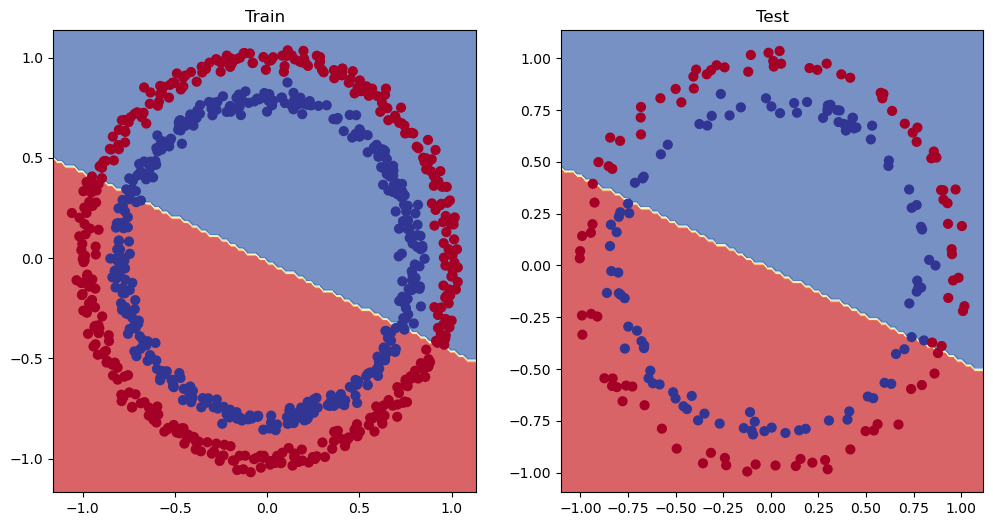

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


#It seems like it just wants to seperate the data into two witha "Linear" line

## Improving a model from a model pespective
* Add more layers - give the model more chances to learn about patterns in the data(Adding too many layers might be bad because the model will try to learn things that are too complex!)

* Add more hidden units- go from 5 hidden units to 10 hidden units

* Fit for longer

* Changing the activation functions

* Change the learning rate (Can be either too low or too high)-exploding gradient problem and vanishing gradient problem.

* Change the loss function



In [28]:
#Improved model ,increased hidden units 5->10
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
    
    def forward(self,x):
        #z=self.layer_1(x)
        #z=self.layer_2(z)
        #z=self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)



In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):

    model_1.train()

    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits,y_train)
    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Testing

    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))

        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    if epoch %100==0:
        print(f"Epoch: {epoch} | Loss:{loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f} , Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss:0.69396, Acc: 50.88% | Test loss: 0.69261 , Test acc: 51.00%
Epoch: 100 | Loss:0.69305, Acc: 50.38% | Test loss: 0.69379 , Test acc: 48.00%
Epoch: 200 | Loss:0.69299, Acc: 51.12% | Test loss: 0.69437 , Test acc: 46.00%
Epoch: 300 | Loss:0.69298, Acc: 51.62% | Test loss: 0.69458 , Test acc: 45.00%
Epoch: 400 | Loss:0.69298, Acc: 51.12% | Test loss: 0.69465 , Test acc: 46.00%
Epoch: 500 | Loss:0.69298, Acc: 51.00% | Test loss: 0.69467 , Test acc: 46.00%
Epoch: 600 | Loss:0.69298, Acc: 51.00% | Test loss: 0.69468 , Test acc: 46.00%
Epoch: 700 | Loss:0.69298, Acc: 51.00% | Test loss: 0.69468 , Test acc: 46.00%
Epoch: 800 | Loss:0.69298, Acc: 51.00% | Test loss: 0.69468 , Test acc: 46.00%
Epoch: 900 | Loss:0.69298, Acc: 51.00% | Test loss: 0.69468 , Test acc: 46.00%


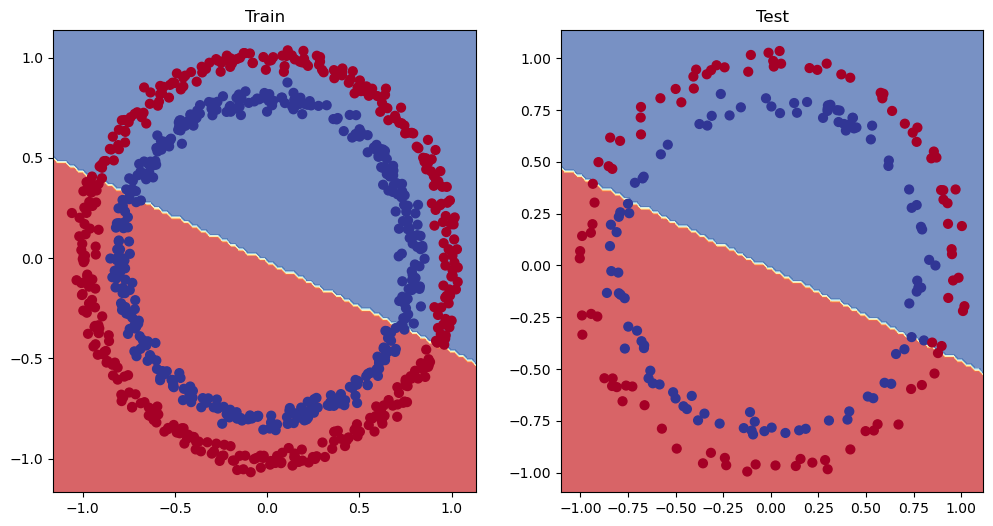

In [31]:
#Plot the boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

#Increasing the hidden layers didn't work

### Preparing data to see if our model can fit a straight line

To troubleshoot a larger problem is to test out a smaller problem


In [33]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [34]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


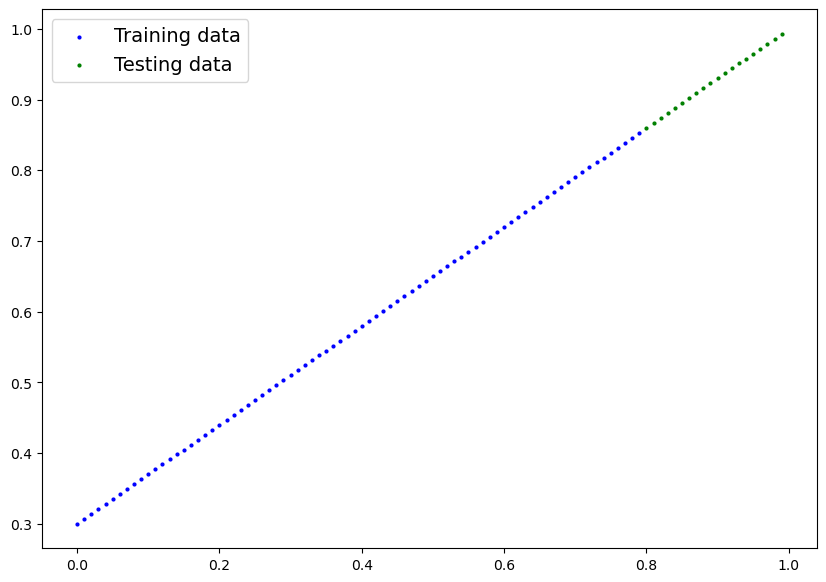

In [35]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [36]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [40]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.06466, Test loss: 0.02598
Epoch: 100 | Train loss: 0.05518, Test loss: 0.00679
Epoch: 200 | Train loss: 0.07117, Test loss: 0.01923
Epoch: 300 | Train loss: 0.05287, Test loss: 0.00530
Epoch: 400 | Train loss: 0.07116, Test loss: 0.00436
Epoch: 500 | Train loss: 0.04987, Test loss: 0.00735
Epoch: 600 | Train loss: 0.04989, Test loss: 0.00927
Epoch: 700 | Train loss: 0.05846, Test loss: 0.00987
Epoch: 800 | Train loss: 0.05230, Test loss: 0.00454
Epoch: 900 | Train loss: 0.04446, Test loss: 0.02777


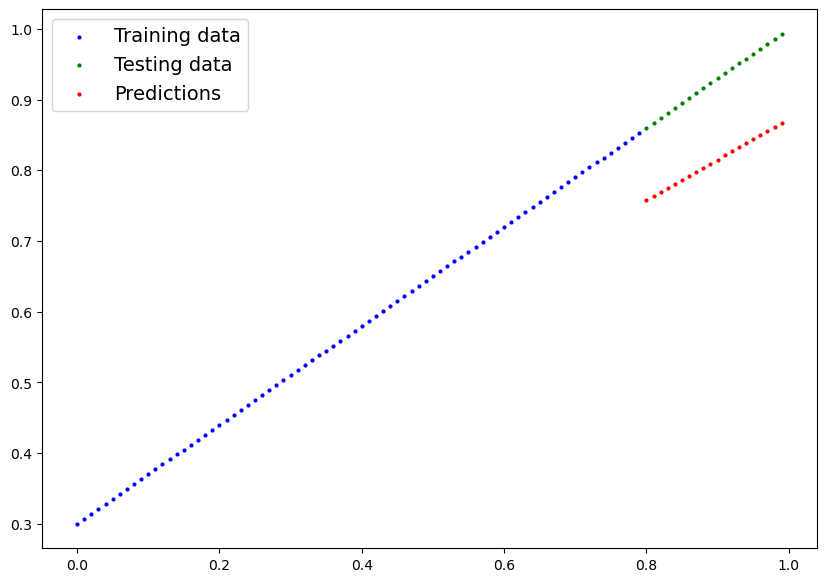

In [41]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());